<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Maria Jose Cantu y Sofia Garcia Mora

**Fecha:** 30 de septiembre del 2020.

**Expediente** : if708916 y if714303
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase 9 Y 10

### Ejercicio 1: 
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

#### RESPUESTA SOFIA 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize

In [7]:
# Código de solución 
def comparar_aleatorios_densidad(f, Finv, N):
    '''Funcion que compara la funcion de densidad de probabilidad 
    con variables alearorias que distribuyen igual que f(x)'''
    #N:cantidad de terminos f:funcion de densidad de probabilidad Finv: x  despejada 
    u=np.random.uniform(0,1,N)
    f_rand=Finv(u)
    x=np.arange(0,1,.01)
    f_densidad=f(x)
    plt.hist(f_rand,density=True, bins=30)
    plt.plot(x,f_densidad)
    plt.show()

$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$


$$U=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$

Despejamos x:


$$x=\sin (\frac{\pi U}{2})^2= F_{inv}$$

Funcion de densidad de probabilidad:

$$f(x)=\frac{d}{dx} F(x)$$

$$f(x)=\frac{d}{dx} (\frac{2}{\pi}\sin^{-1}(\sqrt x))$$

$$f(x)=\frac{1}{\sqrt {1-x} \sqrt x  \pi}$$ 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


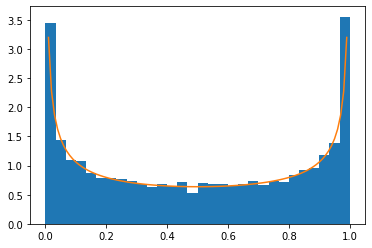

In [8]:
f= lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)
Finv= lambda u: (np.sin(u*np.pi/2))**2
N= 10000
comparar_aleatorios_densidad(f,Finv,N)

#### RESPUESTA MAJO

Moviemiento Browniano
$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$

Función de generar números aleatorios
$$U=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$

Despejando x: Tenemos la función inversa
Genera variables aleatorias que distribuyen con f(x)
$$x=\sin (\frac{\pi U}{2})^2= F_{inv}$$

Función de densidad de probabilidad:
Derivada:
$$f(x)=\frac{d}{dx} F(x)$$

$$f(x)=\frac{d}{dx} (\frac{2}{\pi}\sin^{-1}(\sqrt x))$$

$$f(x)=\frac{1}{\sqrt {1-x} \sqrt x  \pi}$$ 

In [13]:
#ejercicio clase ejercicio 1
import numpy as np
import random


# Función sen
def funcion_comparar_aleatorios(f_x,F_inv,n):
    u = np.random.uniform(0,1,n)
    f_rand = F_inv(u)
    x = np.arange(0,1,.01)
    f_densidad = f_x(x)
    plt.hist(f_rand,density=True, bins=30, color='pink')
    plt.title('Histograma')
    plt.plot(x,f_densidad)
    plt.show()


                   
                   



<ipython-input-12-241a7e047135>:2: RuntimeWarning: divide by zero encountered in true_divide
  f_x = lambda x: 1/((np.sqrt(1-x))*np.pi*np.sqrt(x))


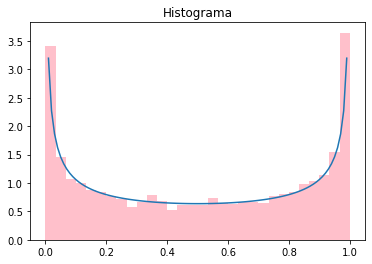

In [12]:
F_inv = lambda u: (np.sin((np.pi*u)/2))**2
f_x = lambda x: 1/((np.sqrt(1-x))*np.pi*np.sqrt(x))
n = 10000
funcion_comparar_aleatorios(f_x,F_inv,n)        



### Ejercicio 2: 
> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

#### RESPUESTA SOFIA 

In [26]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()

In [27]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n) #vector vacio
    Pr[0] = (1-p)**n # P(X=0)--> sustituir X=0
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

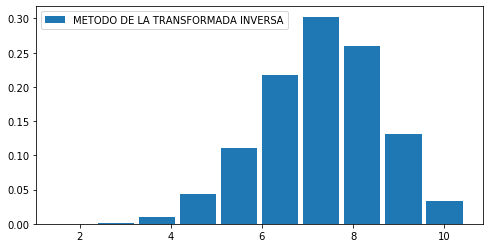

In [29]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'METODO DE LA TRANSFORMADA INVERSA BINOMIAL')

#### RESPUESTA MAJO

$$    \begin{align}
    P_{x}&= \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x} \\
    P_{x+1} &= \frac{n!}{(x+1)!(n-x-1)!}p^{x+1}(1-p)^{n-x-1} \\
    \frac{P_{x+1}}{P_{x}} &= \frac{\frac{n!}{(x+1)!(n-x-1)!}p^{x+1}(1-p)^{n-x-1}}{\frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}}\\
    \frac{P_{x+1}}{P_{x}} &= \frac{n!}{(x+1)!(n-x-1)!}\frac{p^{x+1}(1-p)^{n-x-1}}{p^x(1-p)^{n-x}}\frac{x!(n-x)!}{n!}\\
    \frac{P_{x+1}}{P_{x}} &= \frac {n-x}{x+1}\frac{p}{1-p} \\
    P_{x+1}&= \frac {n-x}{x+1}\frac{p}{1-p}p_x \\
    \text {Pasando las x a is} \\
    P_{i+1}&= \frac {n-i}{i+1}\frac{p}{1-p}p_i
    \end{align}$$

In [2]:
def P_acum_Poisson_o(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]=l/(i+1)*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

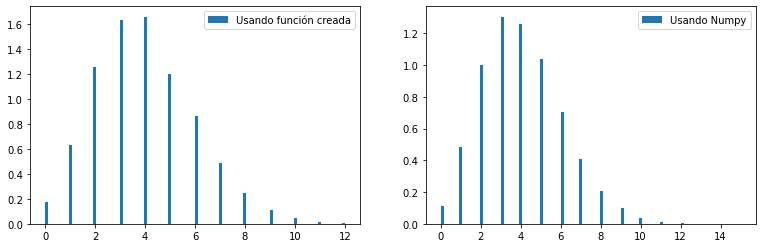

In [3]:
n = 12; l = 4; N = 10**4

p_acum = P_acum_Poisson_o(n,l)
u = np.random.rand(N)

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_pois = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.hist(d_pois,100,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_pois_numpy = np.random.poisson(l,N)
plt.hist(d_pois_numpy,100,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()


> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

#### RESPUESTA MAJO

#### RESPUESTA SOFIA


$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

$$P(k+1,\lambda)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$

Sabemos que $x^{k+1}=x^k x^1$

$$P(k+1,\lambda)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(k+1)!}$$

Sabemo que $x!=x(x-1)!$

$$P(k+1,\lambda)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(k+1)k!}$$

Con la siguinte igualdad $P(k)=\frac{e^{-\lambda}(\lambda)^{k}}{k!}$

$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

In [36]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Poison_o(n,lamb):
    Pr = np.zeros(n) #vector vacio
    Pr[0] = np.exp(-lamb) # P(K=0)--> sustituir K=0
    def pr(i):
        nonlocal Pr
        Pr[i+1]=(lamb/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

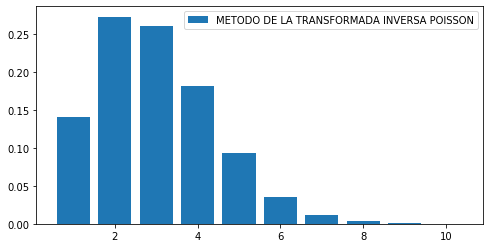

In [38]:
# def D_binomial_intermedia(n,p,N):
n = 10; lamb = 2; N = 10**4

p_acum = P_acum_Poison_o(n,lamb)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'METODO DE LA TRANSFORMADA INVERSA POISSON')

### Ejercicio 4: 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

#### RESPUESTA SOFIA 

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize

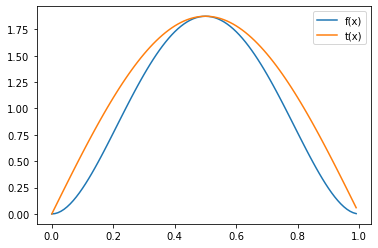

In [17]:
#INCISO 1:
#graficar f(x) y t(x) para ver si t(x) es mas grande que f(x)
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #se esta encontrando el maximo al agregar el - y sacarle el minimo 
# Función t 
t = lambda x: max_f*np.sin(x*np.pi)

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones

# Gráficas de las funciones t(x) y f(x)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

#### RESPUESTA SOFIA 

#### INCISO 2

Sabemos que $g(x) = \frac{t}{c}$ siendo g(x) una densidad

$$c=\int_{0}^{1} t(x)dx$$ 

$$c=\int_{0}^{1} (a \sin(\pi x))dx$$ 

ya que t(x) esta definida entre 0 y 1 y a=1.875
$$c=\int_{0}^{1} 1.875 (\sin(\pi x))dx$$

$$c=-\frac{1.875}{\pi} cos(\pi x)|_{0}^{1} $$

$$c=\frac {3.75}{\pi}$$

Entonces $$g(x)= \frac{1.875 \sin(\pi x)}{\frac {3.75}{\pi}}$$

$$g(x)= 0.5 \pi \sin(\pi x)$$


#### RESPUESTA MAJO

$$    \begin{align}
    t(x)&= asin(\pi x)\\
    g(x)&=t(x)/c \\
    c&= \int_{0}^{1}t(x)d(x) \\
    \int_{0}^{1}t(x)d(x)&= \int_{0}^{1} asin(\pi x)d(x)\\
    \int_{0}^{1} asin(\pi x) &= \frac{2a}{\pi} \\
    g(x) &= \frac{asin(\pi x)}{\frac{2a}{\pi}}\\
    g(x) &= \frac{\pi asin(\pi x)}{2a}\\
    g(x) &= \frac{\pi sin(\pi x)}{2}\\
    g(x)& = 0.5 \pi \sin(\pi x)\\
    \end{align}$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

#### RESPUESTA SOFIA 

#### INCISO 3

$$g(x)= 0.5 \pi \sin(\pi x)$$

Para encontar la acumulada y asi encontar la inversa:
$$G(x)=\int_{0}^{x} g(x) dx$$

$$G(x)=\int_{0}^{x} (0.5 \pi \sin(\pi x)) dx$$

$$G(x)= -(0.5  \cos(\pi x))|_{0}^{x}$$

$$G(x)=-0.5  \cos(\pi x)+0.5$$

$$U=-0.5  \cos(\pi x)+0.5$$

Despejando x:

$$x=\frac {1}{\pi} \arccos(1-2U)=G_{inv}$$

#### RESPUESTA MAJO

 $$    \begin{align}
     g(x) &= \frac{\pi sin(\pi x)}{2} \\
     G(x) &= \int_{-\infty}^{\infty} g(x)d(x)\\
     G(x) &= \int_{0}^{x} g(x)d(x)\\
     G(x) &= \frac{-cos(\pi x)}{2} \\
     \frac{-cos(\pi x)}{2} &= U \\
     -cos(\pi x) &=2 U\\
     cos(\pi x)&=-2 U\\
     \pi x &=arccos(-2 U)\\
     x&=\frac{arccos(-2 U)}{\pi}\\
         U\sim g(x)
     \end{align}$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

#### RESPUESTA SOFIA 

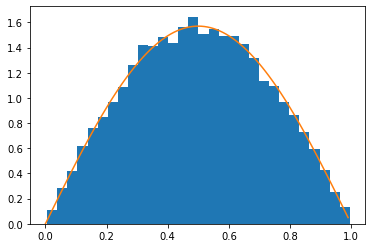

In [11]:
g= lambda x: (np.pi/2)*np.sin(np.pi*x)
G_inv= lambda u: (1/np.pi)*np.arccos(-2*u+1)
N=10000
 
comparar_aleatorios_densidad(g,G_inv,N)

#### RESPUESTA MAJO

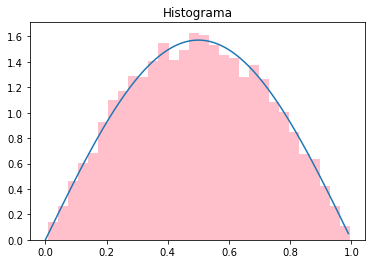

In [33]:
g_x= lambda x: (np.pi/2)*np.sin(np.pi*x)
G_inv= lambda u: (1/np.pi)*np.arccos(-2*u+1)
n=10000
 
HOLA = funcion_comparar_aleatorios(g_x,G_inv,n)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

#### RESPUESTA SOFIA 

In [12]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    #COMPRESION DE LISTAS
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    #para ver el numero y que no grafique 
    ## ver min 65 de clase del 29/09 variables_al= [R1[i] for i in range (len(R1)if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         #for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


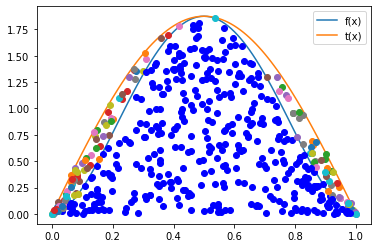

In [13]:
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
#basados en el dominio de la funcion f(x), en este caso el dominio es [0,1]
#entonces yo debo de generar variables aleatorias uniformez entre U-(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

#### RESPUESTA MAJO

In [28]:
# Función de aceptación y rechazo usando compresión de listas

def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    x=np.arange(0,1,.01)
    a = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))#asi encontramos el valor maximo de f
    t_x = t(a,R1)#Creamos el arreglo con distribucion t
    condition = R2*t_x <=f_x #Comparamos
    j=0
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    for i in range(len(R1)):
        if condition[i]:
            j+=1
    plt.show()
    return j/len(R1)

El máximo de f es: [1.875]


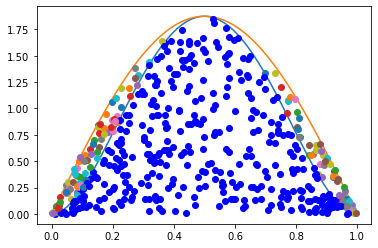

In [29]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda a,x: a*np.sin(np.pi*x) #Funcion "pivote" # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)



# Validación del método
n=500 #numero de puntos a crear
#Creando nuestros Rs
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# basados en el dominio de la función f(x), en este caso el dominio es [0,1],
# entonces yo debo de generar variables aleatorias uniformes entre U~(0,1)
R1=np.random.rand(n) 
R2=np.random.rand(n)
# Gráficas de las funciones
plt.plot(x,f(x), label='f(x)')#Graficando la grafica f
plt.plot(x,t(np.amax(f(x)),x), label='t(x)') #Graficando la grafica t
aleatorias =Acep_rechazo(R2,R1,f,t)#mandamos llamar la funcion para generar puntos

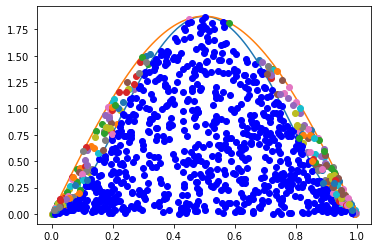

In [35]:
# Validación del método
n=1000 #numero de puntos a crear
#Creando nuestros Rs
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# basados en el dominio de la función f(x), en este caso el dominio es [0,1],
# entonces yo debo de generar variables aleatorias uniformes entre U~(0,1)
R1=np.random.rand(n) 
R2=np.random.rand(n)
# Gráficas de las funciones
plt.plot(x,f(x), label='f(x)')#Graficando la grafica f
plt.plot(x,t(np.amax(f(x)),x), label='t(x)') #Graficando la grafica t
aleatorias_2 =Acep_rechazo(R2,R1,f,t)#mandamos llamar la funcion para generar puntos

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

#### RESPUESTA SOFIA 

In [72]:
def Aceptacion(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#    R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    d = np.zeros(len(R1))
    condition = (R2*t_x)<f_x
    acepta = [1 if condition[i] else 0 for i in range(len(R1))]
    acepta_total= np.array(acepta).sum()
    return acepta_total

In [73]:
t_c = lambda x: max_f*np.ones(len(x)) # función constante
t = lambda x: max_f*np.sin(x*np.pi) # funcion pulso senoidal 

x = np.arange(0,1,0.01) # Rango donde se graficará las funciones

# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)
acepta_t_c = Aceptacion(R2,R1,f,t_c)*100/len(R1)
acepta_t = Aceptacion(R2,R1,f,t)*100/len(R1)

print('Aceptacion cuando se usa t(x) constante: ',acepta_t_c,'%')
print('Aceptación cuando se usa t(x) con pulso senoidal: ',acepta_t,'%')


Aceptacion cuando se usa t(x) constante:  46.4 %
Aceptación cuando se usa t(x) con pulso senoidal:  57.2 %


#### RESPUESTA MAJO

In [36]:
#Son practicamente iguales
aleatorias, aleatorias_2

(0.71, 0.733)

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

#### RESPUESTA SOFIA 

El máximo de f es: [2.109375]


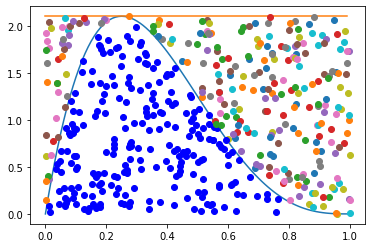

In [20]:
# Función objetivo 
f = lambda x: 20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),5,disp=False))
# Función t 
t = lambda x: max_f*np.ones(len(x))

# Gráficas de las funciones t(x) y f(x)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')

print('El máximo de f es:',max_f)

# Validación del método
N= 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)
Acep_rechazo(R1, R2, f, t)

#### RESPUESTA MAJO

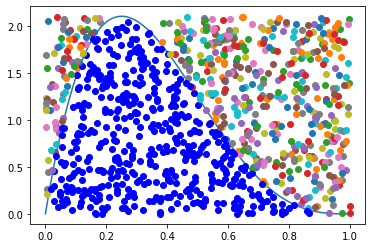

In [37]:
n=1000 #Numero de puntos y len de la var aleatoria
f2=lambda x: 20*x*(1-x)**3 #Funcion de densidad
x=np.arange(0,1,.01) #rango para graficar la funcion
max_x = optimize.fmin(lambda x: -f2(x), 0,disp=False) #encontrando la x que maximiza la funcion
max_fun=f2(max_x) #Evaluando la x en la funcion para encontrar cota superior
R1=np.random.rand(n) 
R2=np.random.rand(n)
t=lambda x: max_fun*np.ones(len(x))#funcion lineal con la cota superior (maximo de la funcion)
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    w=[R2[i]*t_x[i] for i in range(len(R1)) if condition[i]] #Aqui vamos guardando los valores que si pasan la 
    #condicion para despues guardarlos en una variable
    return w
                
    plt.show()
plt.plot(x,f2(x)) #Graficando la funcion para ver que si sirvio nuestro metodo
t=Acep_rechazo2(R2,R1,f2,t)#Aqui vive la variable aleatoria X que surge de nuestra funcion f2 de densidad.

